In [2]:
#余分なワーニングを非表示
import warnings
warnings.filterwarnings('ignore')

In [3]:
#ライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#matplotlib 日本語化対応
import japanize_matplotlib

In [5]:
#データフレーム表示用関数
from IPython.display import display

In [6]:
#NumPyの浮動小数点の表示精度調整
np.set_printoptions(suppress=True, precision=4)

In [7]:
#pandasでも同様の調整
pd.options.display.float_format = '{:.4f}'.format

In [8]:
#データフレームで全ての項目を表示
pd.set_option("display.max_columns",None)

In [9]:
#グラフのデフォルトフォント指定
plt.rcParams["font.size"] = 14

In [10]:
#乱数の種
random_seed = 123

In [11]:
#癌疾患データセットのロード
#ライブラリのインポート
from sklearn.datasets import load_breast_cancer

In [12]:
#データのロード
cancer = load_breast_cancer()

In [13]:
#データの注釈を読む
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [14]:
#データフレームへの取り込み
columns = [
    '半径_平均', 'きめ_平均', '周長_平均', '面積_平均', '平滑度_平均', 
    'コンパクト度_平均', '凹面_平均', '凹点_平均', '対称性_平均',
    'フラクタル度_平均', '半径_標準誤差', 'きめ_標準誤差', '周長_標準誤差',
    '面積_標準誤差', '平滑度_標準誤差', 'コンパクト度_標準誤差', '凹面_標準誤差', 
    '凹点_標準誤差', '対称性_標準誤差', 'フラクタル度_標準誤差', '半径_最大', 
    'きめ_最大', '周長_最大', '面積_最大', '平滑度_最大', 'コンパクト度＿最大', 
    '凹面_最大', '凹点_最大', '対称性_最大', 'フラクタル度_最大'
]

In [15]:
#ロードしたデータのデータフレーへの取り込み
df = pd.DataFrame(cancer.data, columns=columns)

In [16]:
#正解データの取得
y = pd.Series(cancer.target)

In [17]:
#入力データの先頭20行目から24行目までの表示
display(df[20:25])

,半径_平均,きめ_平均,周長_平均,面積_平均,平滑度_平均,コンパクト度_平均,凹面_平均,凹点_平均,対称性_平均,フラクタル度_平均,半径_標準誤差,きめ_標準誤差,周長_標準誤差,面積_標準誤差,平滑度_標準誤差,コンパクト度_標準誤差,凹面_標準誤差,凹点_標準誤差,対称性_標準誤差,フラクタル度_標準誤差,半径_最大,きめ_最大,周長_最大,面積_最大,平滑度_最大,コンパクト度＿最大,凹面_最大,凹点_最大,対称性_最大,フラクタル度_最大
20,13.0800,15.7100,85.6300,520.0000,0.1075,0.1270,0.0457,0.0311,0.1967,0.0681,0.1852,0.7477,1.3830,14.6700,0.0041,0.0190,0.0170,0.0065,0.0168,0.0024,14.5000,20.4900,96.0900,630.5000,0.1312,0.2776,0.1890,0.0728,0.3184,0.0818
21,9.5040,12.4400,60.3400,273.9000,0.1024,0.0649,0.0296,0.0208,0.1815,0.0691,0.2773,0.9768,1.9090,15.7000,0.0096,0.0143,0.0198,0.0142,0.0203,0.0030,10.2300,15.6600,65.1300,314.9000,0.1324,0.1148,0.0887,0.0623,0.2450,0.0777
22,15.3400,14.2600,102.5000,704.4000,0.1073,0.2135,0.2077,0.0976,0.2521,0.0703,0.4388,0.7096,3.3840,44.9100,0.0068,0.0533,0.0645,0.0225,0.0367,0.0044,18.0700,19.0800,125.1000,980.9000,0.1390,0.5954,0.6305,0.2393,0.4667,0.0995
23,21.1600,23.0400,137.2000,1404.0000,0.0943,0.1022,0.1097,0.0863,0.1769,0.0528,0.6917,1.1270,4.3030,93.9900,0.0047,0.0126,0.0171,0.0104,0.0108,0.0020,29.1700,35.5900,188.0000,2615.0000,0.1401,0.2600,0.3155,0.2009,0.2822,0.0753
24,16.6500,21.3800,110.0000,904.6000,0.1121,0.1457,0.1525,0.0917,0.1995,0.0633,0.8068,0.9017,5.4550,102.6000,0.0060,0.0188,0.0274,0.0113,0.0147,0.0028,26.4600,31.5600,177.0000,2215.0000,0.1805,0.3578,0.4695,0.2095,0.3613,0.0956


In [18]:
print(y[20:25])

20    1
21    1
22    0
23    0
24    0
dtype: int64


In [19]:
#入力データの行数、列数の確認
print(df.shape)
print()

#正解データの1と0の個数確認
print(y.value_counts())

(569, 30)

1    357
0    212
dtype: int64


In [20]:
#散布図描画の準備
#データを正解データ=0のグループと正解データ=1のグループに分割する

#正解データ=0(悪性)のデータ抽出
df0 = df[y==0]

#正解データ=1(良性)のデータ抽出
df1 = df[y==1]

display(df0.head())
display(df1.head())

,半径_平均,きめ_平均,周長_平均,面積_平均,平滑度_平均,コンパクト度_平均,凹面_平均,凹点_平均,対称性_平均,フラクタル度_平均,半径_標準誤差,きめ_標準誤差,周長_標準誤差,面積_標準誤差,平滑度_標準誤差,コンパクト度_標準誤差,凹面_標準誤差,凹点_標準誤差,対称性_標準誤差,フラクタル度_標準誤差,半径_最大,きめ_最大,周長_最大,面積_最大,平滑度_最大,コンパクト度＿最大,凹面_最大,凹点_最大,対称性_最大,フラクタル度_最大
0,17.9900,10.3800,122.8000,1001.0000,0.1184,0.2776,0.3001,0.1471,0.2419,0.0787,1.0950,0.9053,8.5890,153.4000,0.0064,0.0490,0.0537,0.0159,0.0300,0.0062,25.3800,17.3300,184.6000,2019.0000,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
1,20.5700,17.7700,132.9000,1326.0000,0.0847,0.0786,0.0869,0.0702,0.1812,0.0567,0.5435,0.7339,3.3980,74.0800,0.0052,0.0131,0.0186,0.0134,0.0139,0.0035,24.9900,23.4100,158.8000,1956.0000,0.1238,0.1866,0.2416,0.1860,0.2750,0.0890
2,19.6900,21.2500,130.0000,1203.0000,0.1096,0.1599,0.1974,0.1279,0.2069,0.0600,0.7456,0.7869,4.5850,94.0300,0.0062,0.0401,0.0383,0.0206,0.0225,0.0046,23.5700,25.5300,152.5000,1709.0000,0.1444,0.4245,0.4504,0.2430,0.3613,0.0876
3,11.4200,20.3800,77.5800,386.1000,0.1425,0.2839,0.2414,0.1052,0.2597,0.0974,0.4956,1.1560,3.4450,27.2300,0.0091,0.0746,0.0566,0.0187,0.0596,0.0092,14.9100,26.5000,98.8700,567.7000,0.2098,0.8663,0.6869,0.2575,0.6638,0.1730
4,20.2900,14.3400,135.1000,1297.0000,0.1003,0.1328,0.1980,0.1043,0.1809,0.0588,0.7572,0.7813,5.4380,94.4400,0.0115,0.0246,0.0569,0.0188,0.0176,0.0051,22.5400,16.6700,152.2000,1575.0000,0.1374,0.2050,0.4000,0.1625,0.2364,0.0768


,半径_平均,きめ_平均,周長_平均,面積_平均,平滑度_平均,コンパクト度_平均,凹面_平均,凹点_平均,対称性_平均,フラクタル度_平均,半径_標準誤差,きめ_標準誤差,周長_標準誤差,面積_標準誤差,平滑度_標準誤差,コンパクト度_標準誤差,凹面_標準誤差,凹点_標準誤差,対称性_標準誤差,フラクタル度_標準誤差,半径_最大,きめ_最大,周長_最大,面積_最大,平滑度_最大,コンパクト度＿最大,凹面_最大,凹点_最大,対称性_最大,フラクタル度_最大
19,13.5400,14.3600,87.4600,566.3000,0.0978,0.0813,0.0666,0.0478,0.1885,0.0577,0.2699,0.7886,2.0580,23.5600,0.0085,0.0146,0.0239,0.0132,0.0198,0.0023,15.1100,19.2600,99.7000,711.2000,0.1440,0.1773,0.2390,0.1288,0.2977,0.0726
20,13.0800,15.7100,85.6300,520.0000,0.1075,0.1270,0.0457,0.0311,0.1967,0.0681,0.1852,0.7477,1.3830,14.6700,0.0041,0.0190,0.0170,0.0065,0.0168,0.0024,14.5000,20.4900,96.0900,630.5000,0.1312,0.2776,0.1890,0.0728,0.3184,0.0818
21,9.5040,12.4400,60.3400,273.9000,0.1024,0.0649,0.0296,0.0208,0.1815,0.0691,0.2773,0.9768,1.9090,15.7000,0.0096,0.0143,0.0198,0.0142,0.0203,0.0030,10.2300,15.6600,65.1300,314.9000,0.1324,0.1148,0.0887,0.0623,0.2450,0.0777
37,13.0300,18.4200,82.6100,523.8000,0.0898,0.0377,0.0256,0.0292,0.1467,0.0586,0.1839,2.3420,1.1700,14.1600,0.0044,0.0049,0.0134,0.0116,0.0267,0.0018,13.3000,22.8100,84.4600,545.9000,0.0970,0.0462,0.0483,0.0501,0.1987,0.0617
46,8.1960,16.8400,51.7100,201.9000,0.0860,0.0594,0.0159,0.0059,0.1769,0.0650,0.1563,0.9567,1.0940,8.2050,0.0090,0.0165,0.0159,0.0059,0.0257,0.0026,8.9640,21.9600,57.2600,242.2000,0.1297,0.1357,0.0688,0.0256,0.3105,0.0741


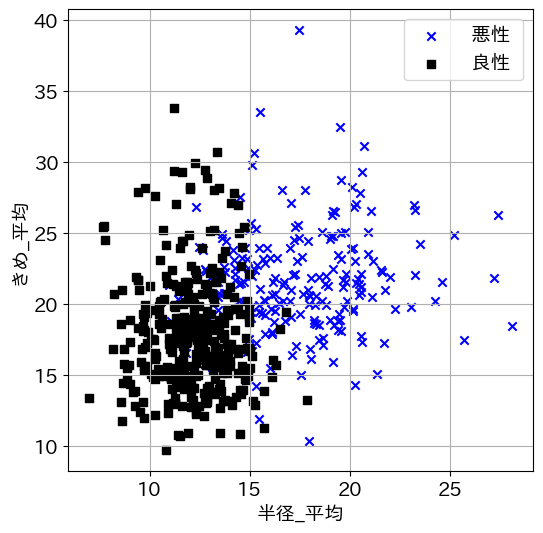

In [21]:
#散布図表示

#グラフサイズ設定
plt.figure(figsize=(6,6))

#目的変数が0のデータを散布図表示
plt.scatter(df0['半径_平均'], df0['きめ_平均'], marker='x', c='b', label=' 悪性 ')

#目的変数が1のデータを散布図表示
plt.scatter(df1['半径_平均'], df1['きめ_平均'], marker='s', c='k', label=' 良性 ')

#格子表示
plt.grid()

#ラベル表示
plt.xlabel('半径_平均')
plt.ylabel('きめ_平均')

#凡例表示
plt.legend()

#グラフを表示
plt.show()

In [22]:
#入力データを2項目だけに絞り込む

input_columns = ['半径_平均', 'きめ_平均' ]
x = df[input_columns]
display(x.head())


,半径_平均,きめ_平均
0,17.9900,10.3800
1,20.5700,17.7700
2,19.6900,21.2500
3,11.4200,20.3800
4,20.2900,14.3400


In [23]:
#訓練データと検証データの分割
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=random_seed)

In [24]:
#分割結果の確認(要素数)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 2)
(171, 2)
(398,)
(171,)


In [25]:
#分割結果の確認(データ内容)

display(x_train.head())
display(x_test.head())
display(y_train.head())
display(y_test.head())

,半径_平均,きめ_平均
559,11.5100,23.9300
295,13.7700,13.2700
264,17.1900,22.0700
125,13.8500,17.2100
280,19.1600,26.6000


,半径_平均,きめ_平均
333,11.2500,14.7800
273,9.7420,15.6700
201,17.5400,19.3200
178,13.0100,22.2200
85,18.4600,18.5200


559    1
295    1
264    0
125    1
280    0
dtype: int64

333    1
273    1
201    0
178    1
85     0
dtype: int64

In [26]:
#アルゴリズム選択(ロジスティック回帰)とアルゴリズムの初期化

from sklearn.linear_model import LogisticRegression
algorithm = LogisticRegression(random_state=random_seed)

In [28]:
#学習
algorithm.fit(x_train, y_train)
print(algorithm)

LogisticRegression(random_state=123)


In [29]:
#予測

#predict関数の呼び出し
y_pred = algorithm.predict(x_test)

#結果の確認
print(y_pred)

[1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1
 1 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 0
 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 1]


In [30]:
#正解データと予測結果の比較

#正解データ 先頭から10個
#y_testはDataFrameなので、valuesによりNumPyに変換しておく
y_test10 = y_test[:10].values
print(y_test10)

#予測結果 先頭から10個
y_pred10 = y_pred[:10]
print(y_pred10)

[1 1 0 1 0 1 1 0 1 1]
[1 1 0 1 0 1 1 1 1 1]


In [31]:
#正解数のカウント

#正解データ = 予測結果
w1 = (y_test10 == y_pred10)
print(w1)

#正解データの数
w2 = w1.sum()
print(w2)

[ True  True  True  True  True  True  True False  True  True]
9


In [32]:
#制度の計算

#正解数の計算
w = (y_test.values == y_pred)
correct = w.sum()

#検証データ全体数の計算
N = len(w)

#精度=(正解数)/(検証データ全体数)
score = correct / N

#結果表示
print(f'精度: {score:0.4f}')

精度: 0.8772


In [33]:
#score関数の利用
score = algorithm.score(x_test, y_test)
print(f'score: {score:.04f}')

score: 0.8772


In [34]:
#モデルの精度を上げる

#オリジナルの30項目の入力データを使って、訓練データ、検証データを作り直す
x2_train, x2_test, y_train, y_test = train_test_split(df, y, train_size=0.7, test_size=0.3, random_state=random_seed)

#ロジスティック回帰モデルのインスタンスを新たに作り直す
algorithm2 = LogisticRegression(random_state=random_seed)

#訓練データで学習
algorithm2.fit(x2_train, y_train)

#検証データで精度を確認
score2 = algorithm2.score(x2_test, y_test)
print(f'score: {score2:.04f}')

score: 0.9591


In [35]:
#混同行列の実装
#入力データx
x = cancer.data

#正解データy
#良性:0 悪性:1に変更する
y = 1 - cancer.target

#入力データを２次元に絞り込み
x2 = x[:,:2]

#データ分割
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x2, y,
                                                    train_size=0.7, random_state=random_seed)

In [36]:
#アルゴリズム選択から評価まで

#アルゴリズム選択(ロジスティック回帰)
from sklearn.linear_model import LogisticRegression
algorithm = LogisticRegression(random_state=random_seed)

#学習
algorithm.fit(x_train, y_train)

#予測
y_pred = algorithm.predict(x_test)

#評価
score = algorithm.score(x_test, y_test)

#結果確認
print(f'score: {score:.4f}')

score: 0.8772


In [37]:
#混同行列の計算

#必要ライブラリの取り込み
from sklearn.metrics import confusion_matrix

#混同行列の生成
# y_test: 検証データの正解データ
# y_pred: 検証データの予測結果
matrix = confusion_matrix(y_test, y_pred)

#結果確認
print(matrix)

[[101   2]
 [ 19  49]]


In [40]:
#混同行列表示用関数

def make_cm(matrix, columns):
    #columns 項目名リスト
    n = len(columns)
    
    #'正解データ'をn回繰り返すリスト作成
    act = ['正解データ'] * n
    pred = ['予測結果'] * n
    
    #データフレーム生成
    cm = pd.DataFrame(matrix, columns=[pred, columns],
                      index =[act, columns])
    return cm

In [41]:
#make_cmを使った混同行列の表示
cm = make_cm(matrix, ['良性', '悪性'])
display(cm)

予測結果    
           良性  悪性
正解データ 良性  101   2
      悪性   19  49

In [42]:
#適合率・再現率・F値の計算

#ライブラリの取り込み
from sklearn.metrics import precision_recall_fscore_support

#適合率・再現率・F値の計算
#average ='binary'はモデルが2値分類であるという意味
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

#予測結果の確認
print(f'適合率: {precision:.4f}')
print(f'再現率: {recall:.4f}')
print(f'F値: {fscore:.4f}')

適合率: 0.9608
再現率: 0.7206
F値: 0.8235


In [43]:
y_proba = algorithm.predict_proba(x_test)
print(y_proba[:10, :])

[[0.9925 0.0075]
 [0.9981 0.0019]
 [0.0719 0.9281]
 [0.8134 0.1866]
 [0.0345 0.9655]
 [0.6376 0.3624]
 [0.9694 0.0306]
 [0.9743 0.0257]
 [0.76   0.24  ]
 [0.9775 0.0225]]


In [44]:
#positive(1)の確率値の取得
y_proba1 = y_proba[:,1]

#結果確認
print(y_test[10:20])
print(y_pred[10:20])
print(y_proba1[10:20])

[0 1 1 0 1 0 0 0 0 0]
[0 1 0 0 1 0 0 0 0 0]
[0.2111 0.9188 0.1617 0.0609 0.631  0.0549 0.0601 0.0506 0.0383 0.0164]


In [45]:
#閾値を変化させる
thres = 0.5
print((y_proba1[10:20] > thres).astype(int))

thres = 0.7
print((y_proba1[10:20] > thres).astype(int))

[0 1 0 0 1 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0]


In [46]:
#閾値を変更した場合の予測関数の定義
def pred(algorithm, x, thres):
    #確率値の取得(行列)
    y_proba = algorithm.predict_proba(x)
    
    #予測結果1の確率値
    y_proba1 = y_proba[:,1]
    
    #予測結果１の確率値
    y_pred = (y_proba1 > thres).astype(int)
    return y_pred

In [47]:
#　閾値0.5で予測結果取得
pred_05 = pred(algorithm, x_test, 0.5)

#閾値0.7で予測結果取得
pred_07 = pred(algorithm, x_test, 0.7)

#結果確認
print(pred_05[10:20])
print(pred_07[10:20])

[0 1 0 0 1 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0]


In [48]:
#ライブラリの取得(PR曲線を描くため)
from sklearn.metrics import precision_recall_curve
#適合率、再現率、閾値の取得
precision, recall, thresholds = precision_recall_curve(y_test, y_proba1)
#結果をデータフレームにする
df_pr = pd.DataFrame([thresholds, precision, recall]).T
df_pr.columns = ['閾値', '適合率' ,'再現率']
#閾値0.5の周辺を表示
display(df_pr[52:122:10])

,閾値,適合率,再現率
52,0.0322,0.5462,0.9559
62,0.0491,0.5963,0.9559
72,0.0601,0.6465,0.9412
82,0.0987,0.7191,0.9412
92,0.1602,0.8101,0.9412
102,0.2170,0.8551,0.8676
112,0.3624,0.9492,0.8235


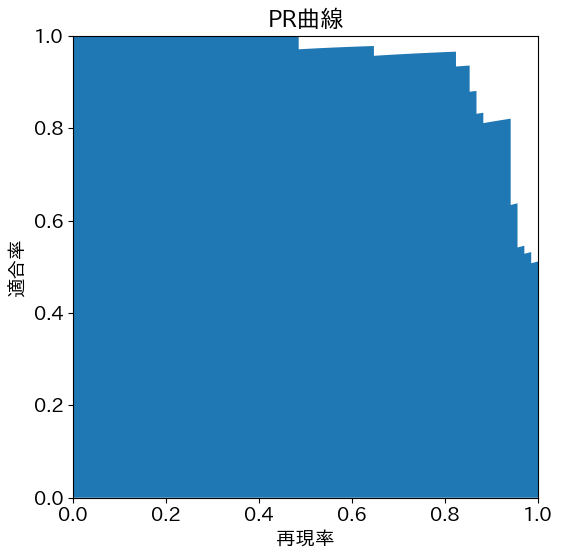

In [49]:
#描画サイズ指定
plt.figure(figsize=(6,6))
#グラフ値域の塗りつぶし
plt.fill_between(recall, precision, 0)
#x, yの範囲指定
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
#ラベル・タイトル表示
plt.xlabel('再現率')
plt.ylabel('適合率')
plt.title('PR曲線')
plt.show()

In [ ]:
#PR曲線下面積の計算(1に近いほどモデルの精度が高い)
from sklearn.metrics import auc
